<a href="https://colab.research.google.com/github/Jigar098/DataScience/blob/main/DS_practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Loan_Prediction.csv to Loan_Prediction.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('Loan_Prediction.csv', na_values =['?'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df['Loan_Status'] = np.where((df['Loan_Status'] == 'Y'), 1, 0)
df['Married'] = np.where((df['Married'] == 'Yes'), 1, 0)
df['Gender'] = np.where((df['Gender'] == 'Female'), 1, 0)
df['Education'] = np.where((df['Education'] == 'Graduate'), 1, 0)
df['Self_Employed'] = np.where((df['Self_Employed'] == 'Yes'), 1, 0)
df['Dependents'] = np.where((df['Dependents'] == '0'), 0, 1)

In [10]:
df.drop('Loan_ID', axis=1, inplace=True)

In [11]:
def f(row):
  if row['Property_Area'] == "Rural":
    val = 1
  elif row['Property_Area'] == "Urban":
    val = 0
  else:
    val = 2
  return val

df['Property_Area'] = df.apply(f, axis=1)

In [56]:
df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [57]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df.isnull().sum().sort_values(ascending = False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

In [58]:
df['Credit_History'] = df['Credit_History'].fillna(1)
df.isnull().sum().sort_values(ascending = False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

In [59]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df.isnull().sum().sort_values(ascending = False)

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
dtype: int64

In [72]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [60]:
df.dropna(inplace = True)
df.shape

(600, 12)

In [74]:
x= df[['Credit_History','CoapplicantIncome','Married','Property_Area']]
y = df['Loan_Status']
X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size=0.2)

In [75]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(480, 12)
(480,)
(120, 12)
(120,)


In [76]:
knn=KNeighborsClassifier(n_neighbors=5)

In [77]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
accuracy_score(Y_test,knn.predict(X_test))

0.5833333333333334

In [79]:
X_best= SelectKBest(chi2, k=5).fit(X_train, Y_train)
mask = X_best.get_support() 
new_feat = []
for bool, feature in zip(mask, X_train.columns):
 if bool:
     new_feat.append(feature)

In [80]:
new_feat

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Loan_Status']

In [82]:
del knn
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.5833333333333334

In [83]:
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select = 5)
selector = selector.fit(X_train, Y_train)
rfe_mask = selector.get_support() 

In [84]:
new_feat = [] 
for bool, feature in zip(rfe_mask, X_train.columns):
 if bool:
     new_feat.append(feature)
new_feat

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Credit_History',
 'Loan_Status']

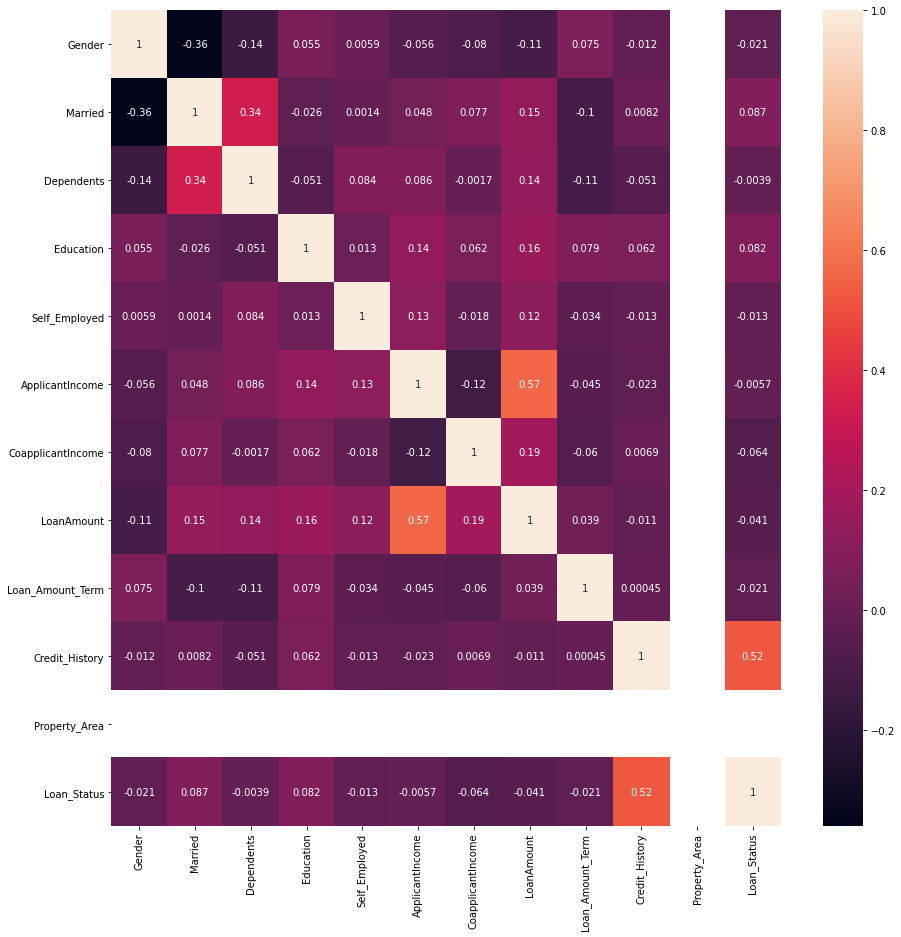

In [89]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
abs(corr['DEATH_EVENT']).sort_values(ascending = False)